# CSS324 Homework Assignment 2

CIFAR10 is a small image classification dataset. Its objective is to classification an 32x32 color image into 10 classes.

See https://www.cs.toronto.edu/~kriz/cifar.html and https://keras.io/api/datasets/cifar10/ for more details.

## Group Members
1. Teetawat Bussabarati 6422782423 
2. Napat ... (Three)

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Load CIFAR10 dataset
(x, y), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
y, y_test = y.flatten(), y_test.flatten()
x = x / 255
x_test = x_test / 255

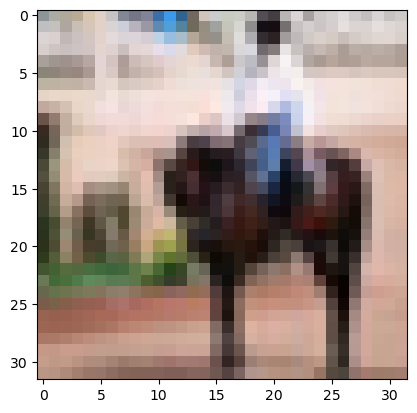

Class= 7


In [3]:
# Plot a training example
plt.imshow(x[11, :, :, :])
plt.show()
print(f"Class= {y[11]}")        # 7 = horse

In [4]:
# Split the training set
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(x, y, test_size=0.2, random_state=11)
X_test = x_test

print("Shape of the datasets")
print("Training set   =", X_train.shape, y_train.shape)
print("Validation set =", X_valid.shape, y_valid.shape)
print("Test set       =", X_test.shape, y_test.shape)

Shape of the datasets
Training set   = (40000, 32, 32, 3) (40000,)
Validation set = (10000, 32, 32, 3) (10000,)
Test set       = (10000, 32, 32, 3) (10000,)


In [5]:
# Use one-hot encoding for y
Y_train = tf.one_hot(y_train, 10)
Y_valid = tf.one_hot(y_valid, 10)
Y_test = tf.one_hot(y_test, 10)

Metal device set to: Apple M1 Max

systemMemory: 64.00 GB
maxCacheSize: 24.00 GB



2023-11-15 11:42:55.481448: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-11-15 11:42:55.481859: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


## Task

Construct a deep neural network to classify images in the CIFAR10 dataset. You can choose the numbers of hidden nodes, appropriate activation functions, regularizers, or the structure of the network. 

After the training process, print the training, validation, and test accuracies, as well as plot the training loss and validation loss.

**Contraints**
 - The number of weight layers must be less than or equal to 6.
 - The number of training epochs must be set to 50.
 - Your model must achieve the test accuracy of at least 60%.

**Rules**
 - This is a group work. Each group can compose of up to three members.

In [6]:
# Your implementation for Question 1
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Input, Dense, Flatten

model = Sequential([
    Input(shape=(32, 32, 3)),
    Flatten(),
    Dense(500, activation='relu'),
    Dense(10, activation='softmax')
])

model.summary()

model.compile(optimizer=tf.keras.optimizers.Adam(3e-4), loss='categorical_crossentropy', metrics=['accuracy'])

hist1 = model.fit(X_train, Y_train, batch_size=4096, validation_data=(X_valid, Y_valid), epochs=50)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 500)               1536500   
                                                                 
 dense_1 (Dense)             (None, 10)                5010      
                                                                 
Total params: 1,541,510
Trainable params: 1,541,510
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50


2023-11-15 11:42:56.494731: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-11-15 11:42:56.764228: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


10/10 [==============================] - ETA: 0s - loss: 2.3414 - accuracy: 0.1654

2023-11-15 11:43:00.028888: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


10/10 [==============================] - 5s 305ms/step - loss: 2.3414 - accuracy: 0.1654 - val_loss: 2.1150 - val_accuracy: 0.2412
Epoch 2/50
10/10 [==============================] - 1s 88ms/step - loss: 2.0449 - accuracy: 0.2632 - val_loss: 1.9890 - val_accuracy: 0.2919
Epoch 3/50
10/10 [==============================] - 1s 87ms/step - loss: 1.9404 - accuracy: 0.3147 - val_loss: 1.9138 - val_accuracy: 0.3351
Epoch 4/50
10/10 [==============================] - 1s 87ms/step - loss: 1.8860 - accuracy: 0.3410 - val_loss: 1.8728 - val_accuracy: 0.3466
Epoch 5/50
10/10 [==============================] - 1s 87ms/step - loss: 1.8513 - accuracy: 0.3558 - val_loss: 1.8471 - val_accuracy: 0.3587
Epoch 6/50
10/10 [==============================] - 1s 87ms/step - loss: 1.8235 - accuracy: 0.3656 - val_loss: 1.8196 - val_accuracy: 0.3737
Epoch 7/50
10/10 [==============================] - 1s 86ms/step - loss: 1.7988 - accuracy: 0.3776 - val_loss: 1.7942 - val_accuracy: 0.3812
Epoch 8/50
10/10 [=====

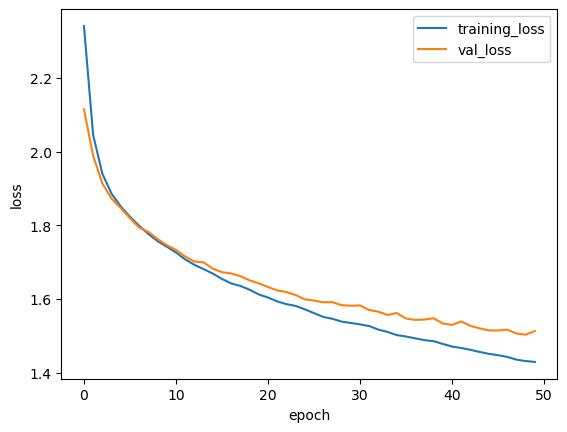

In [7]:
# Plot the training loss and validation loss
N = len(hist1.history['loss'])
plt.plot(np.arange(N), hist1.history['loss'])
plt.plot(np.arange(N), hist1.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training_loss', 'val_loss'], loc='upper right')
plt.show()

In [8]:
res = model.evaluate(X_train, Y_train, verbose=0, batch_size=2048)
print(f"Training accuracy   = {res[1]:.4f}")
res = model.evaluate(X_valid, Y_valid, verbose=0, batch_size=2048)
print(f"Validation accuracy = {res[1]:.4f}")
res = model.evaluate(X_test, Y_test, verbose=0, batch_size=2048)
print(f"Test accuracy       = {res[1]:.4f}")

Training accuracy   = 0.5060
Validation accuracy = 0.4687
Test accuracy       = 0.4719
